In [1]:
using Interact, Plots, DifferentialEquations, BifurcationKit, Setfield
using NonLinearDynamicsCourse

WebIO._IJuliaInit()

┌ Info: Precompiling NonLinearDynamicsCourse [6762868a-e78a-451a-a6ea-484381d56062]
└ @ Base loading.jl:1342


# Ecuacion diferencial lineal. Ley de enfriamiento de Newton

En este caso la variable $x$ es la temperatura del objeto y R es su tasa de intercambio de calor (que depende del calor especifico y el area de contacto). $x_{eq}$ es la temperatura de equilibrio (temperatura ambiente).
La evolucion de la temperatura esta dada por 

$\dot{x} = -R(x-x_{eq})$

Aqui $x$ es la variable y tenemos dos parámetros $R$ y $x_{eq}$. Vamos a definir esta ecuación usando una función de la variable $x$ y de un vector de parametros $p$ ($p[1]=R$ y $p[2]=x_{eq}$) y que de forma general depende del tiempo $t$.

In [2]:
cooling(x,p,t) = -p[1]*(x-p[2])

cooling (generic function with 1 method)

Luego definimos el problema usando la funcion ODEProblem de DifferentialEquations. El problema queda definido por la funcion (newton), la condicion inicial (xini), el tiempo inicial y final (tspan) y el vector de parametros $p=[R,x_{eq}]$)

In [3]:
x0 = 80
R = 0.03
xeq = 25
tspan = (0,150.0)
prob = ODEProblem(cooling, x0, tspan, [R,xeq])

ODEProblem with uType Int64 and tType Float64. In-place: false
timespan: (0.0, 150.0)
u0: 80

## Evolucion temporal 
Podemos graficar la solucion del sistema y para un valor particular del parametro y de la condicion inicial

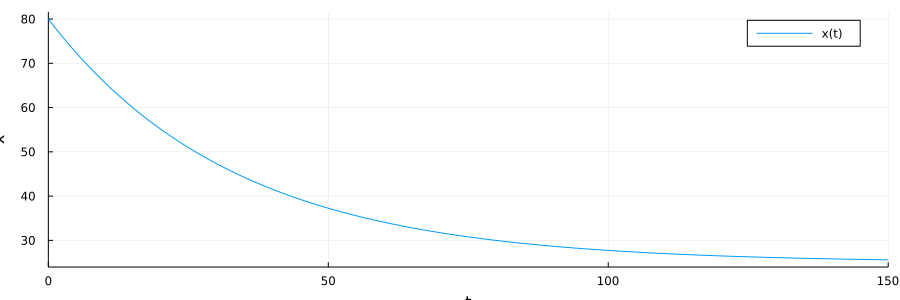

In [4]:
sol = solve(prob)
plot(sol,size=(900,300),label="x(t)",ylabel="x")

## Multiples condiciones iniciales

Usando EnsembleProblem y un vector de condiciones iniciales (x0_arr) podemos evolucionar varias condiciones iniciales al mismo tiempo


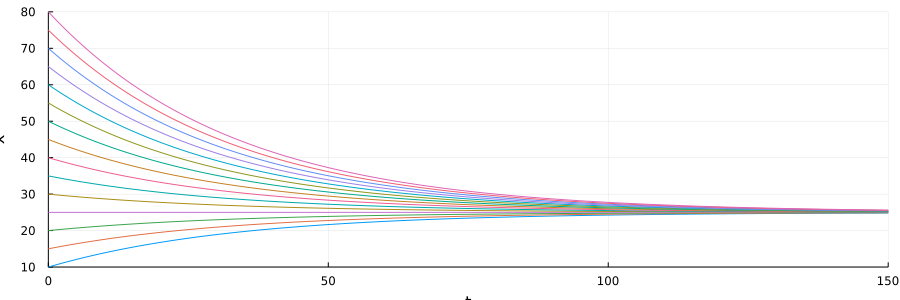

In [5]:
x0_arr=10.0:5.0:80.0
function prob_func(prob,i,repeat)
  remake(prob,u0=x0_arr[i])
end
sol = solve(EnsembleProblem(prob,prob_func=prob_func),EnsembleThreads(),trajectories=length(x0_arr))
plot(sol,ylabel="x",size = (900,300))

## Interaccion
usando @manipulate podemos darle un rango al parametro, la condicion incial y el tiempo maximo de integracion y jugar con eso de forma interactiva 

In [6]:
@manipulate throttle=.1 for R=0:0.02:1.0,x0=0:0.1:30,xeq=0:1.0:100.0,tmax=1.0:10:150
    prob = ODEProblem(cooling, x0, (0,tmax), [R,xeq])
    sol = solve(prob)
    plot(sol,label="x(t)",ylabel="x",ylim=(0,100),size=(900,300))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["R"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 51, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
26, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008a6cf6c0, Task (runnable) @0x000000008a6cf6c0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.02\",\"0.04\",\"0.06\",\"0.08\",\"0.1\",\"0.12\",\"0.14\",\"0.16\",\"0.18\",\"0.2\",\"0.22\",\"0.24\",\"0.26\",\"0.28\",\"0.3\",\"0.32\",\"0.34\",\"0.36\",\"0.38\",\"0.4\",\"0.42\",\"0.44\",\"0.46\",\

## Potencial

Todos los sistemas 1D se pueden escribir derivados de un Potencial. Un potencial $V(x)$ se define a partir de:

$\dot{x} = - \frac{dV}{dx}$

Es decir si la funcion de la derecha de la ecuacion diferencial $f(x)$ se puede escribir como la derivada de una funcion $V(x)$ (con un signo menos) entonces esa funcion es el potencial. Esa funcion siempre va a existir a menos de una constante arbitraria y se va a poder calcular integrando $f(x)$.

Cual es la utilidad del potencial? Por ahora solo como una representacion. La dinámica temporal de la variable $x$ se puede interpretar también como el movimiento de una partícula con mucha friccion que se mueve bajo la accion de la gravedad en ese potencial. Los picos y valles de ese potencial representan los puntos fijos inestables y estables respectivamente. Las trayectorias $x(t)$ se mueven naturalmente hacia los pozos, minimos locales del potencial, y si son colocadas cerca de un pico se apartan del mismo.

Para la Ley de Enfriamiento de Newton el potencial se puede calcular de forma explicita:

$V(x) = Rx(x/2-x_{eq})$

se puede verificar que:

$\frac{dV}{dx} = R(x-x_{eq})$

La forma del potencial es una parabola que corta al eje horizontal en $x=0$ y $x=2x_{eq}$ son el minimo de potencial (punto fijo estable) en $x=x_{eq}$. Por lo tanto cualquier condicion inicial para $x$ va a evolucionar hacia el  fondo del pozo (no nos interesa aca la forma en la que se aproxima sino el destino final).


# Ecuacion Logistica
Sistema mas simple que modela el crecimiento de una poblacion con capacidad K y tasa de crecimiento R

Ecuacion diferencial de primer orden, x corresponde a la poblacion normalizada por la capacidad K y R a la tasa de crecimiento. Ambos son parametros positivos.

$ \dot{x} = Rx(1-x/K) $ 

Esta ecuacion presenta dos puntos fijos. Uno en $x=0$ que es siempre inestable. En su vecindad, para una pequeña poblacion positiva se presenta un crecimiento expopencial con tasa R ya que 1 es mucho mayor que $x/K$.

El otro punto fijo es $x=K$ y es siempre estable y representa la poblacion maxima que alcanza el crecimiento. 
Si $x$ es ligeramente inferior a $K$ entonces $(1-x/K)$ es positivo, la derivada es positiva y la población crece. Si en cambio $x$ es ligeramente superior a $K$ luego $(1-x/K)$ es negativo, la derivada es negativa y la población decrece hasta alcanzar el equilibrio en $x=K$.

Este sistema no presenta bifurcaciones.

In [7]:
# Ecuacion Logistica
logistic(x,p,t)=p[1]*x*(1.0-x/p[2])

logistic (generic function with 1 method)

In [8]:
@manipulate throttle=.1 for R=0:0.02:2.0,K=0:0.01:2.0,x0=0:0.02:2.0,tmax=1.0:5:50
    prob = ODEProblem(logistic, x0, (0,tmax), [R,K])
    sol = solve(prob)
    plot(sol,label="x(t)",ylabel="x",ylim=(0,2.0),size=(900,300))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["R"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000082a3f210, Task (runnable) @0x0000000082a3f210), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.02\",\"0.04\",\"0.06\",\"0.08\",\"0.1\",\"0.12\",\"0.14\",\"0.16\",\"0.18\",\"0.2\",\"0.22\",\"0.24\",\"0.26\",\"0.28\",\"0.3\",\"0.32\",\"0.34\",\"0.36\",\"0.38\",\"0.4\",\"0.42\",\"0.44\",\"0.46\",

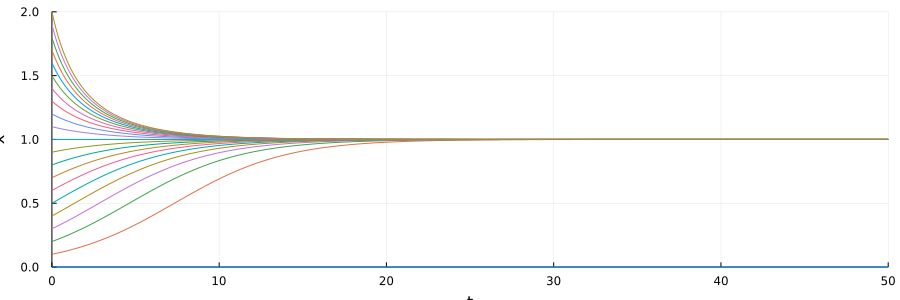

In [9]:
# multiples trayectorias
x0_arr=0.0:0.1:2.0
prob = ODEProblem(logistic, 0.2, (0,50), [0.3,1.0])
sol = solve(EnsembleProblem(prob,prob_func=prob_func),EnsembleThreads(),trajectories=length(x0_arr))
plot(sol,ylabel="x",size = (900,300))

## Evolucion temporal y f(x)
Ahora vamos graficar, ademas de la evolucion temporal, la funcion $f(x)$ para poder visualizar los puntos fijos y el flujo sobre la linea.

Podemos ver que $f(x)$ es una parabola invertida que corta el eje horizontal siempre en los puntos fijos $x=0$ y $x=K$

In [10]:
@manipulate throttle=.1 for R=0:0.02:2.0,K=0:0.01:2.0,x0=0:0.02:2.0,tmax=1.0:5:30
    flux1D(logistic,x0,tmax,[R,K];xlims=[0.0,2.0])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["R"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008420f210, Task (runnable) @0x000000008420f210), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.02\",\"0.04\",\"0.06\",\"0.08\",\"0.1\",\"0.12\",\"0.14\",\"0.16\",\"0.18\",\"0.2\",\"0.22\",\"0.24\",\"0.26\",\"0.28\",\"0.3\",\"0.32\",\"0.34\",\"0.36\",\"0.38\",\"0.4\",\"0.42\",\"0.44\",\"0.46\",

## Potencial de la Ecuacion Logistica

En este caso el potencial es una función cúbica:

$V(x) = \frac{Rx^2}{3K}\left(x- \frac{3K}{2}\right)$

que tiene un minimo en $x=K/2$ y corta el eje horizontal en $x=3K/2$ y lo toca tangencialmente con un pico (raiz doble) en $x=0$. Veamos el aspecto que tiene y como evoluciona la trayectoria desde el punto inicial hasta el fondo del pozo.

In [18]:
Vlogistic(x,p) = p[1]*x*x/(3*p[2])*(x-3*p[2]/2)
@manipulate throttle=.1 for R=0:0.02:2.0,K=0.01:0.01:2.0,x0=0:0.01:2.0
    potential1D(Vlogistic,x0,100.0,[R,K];xlims=[0.0,max(2*K,x0)])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["R"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000f1e4970, Task (runnable) @0x000000000f1e4970), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.02\",\"0.04\",\"0.06\",\"0.08\",\"0.1\",\"0.12\",\"0.14\",\"0.16\",\"0.18\",\"0.2\",\"0.22\",\"0.24\",\"0.26\",\"0.28\",\"0.3\",\"0.32\",\"0.34\",\"0.36\",\"0.38\",\"0.4\",\"0.42\",\"0.44\",\"0.46\",

# Ecuacion Logistica con Harvest

En su version mas simple se agrega un termino de decrecimiento constante que representa el harvest (cosecha, caza, pesca)

$ \dot{x} = Rx\left(1-\frac{x}{K}\right) - H$ 

Atencion: no es un modelo realista para una poblacion porque me puede dar un valor de x negativo. Debido a esto vamos a tener que introducir una condicion de corte en el integrador (como detalle tecnico eso se hace mediante una funcion de Callback **DiscreteCallback** que si cumple una condicion (en este caso que la variable sea menor que 0), llama a la una funcion que termina la integracion (**terminate!**)

El efecto de agregar el termino constante es el de correr los puntos fijos en $0$ y $K$ a los nuevos valores:

$x_* = K/2  \pm \sqrt{K^2/4-KH/R}  $

In [12]:
# Ecuacion Logistica con harvest
logharvest1(x,p,t)=p[1]*x*(1.0-x/p[2])-p[3]

logharvest1 (generic function with 1 method)

In [13]:
@manipulate throttle=.05 for R=0:0.02:2.0,K=0.01:0.01:2.0,H=0:0.01:0.5,x0=0:0.02:2.0,tmax=1.0:5:50
    flux1D(logharvest1,x0,tmax,[R,K,H],(u)->(u<0);xlims=[0.0,2.0])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["R"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008a8cb850, Task (runnable) @0x000000008a8cb850), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.02\",\"0.04\",\"0.06\",\"0.08\",\"0.1\",\"0.12\",\"0.14\",\"0.16\",\"0.18\",\"0.2\",\"0.22\",\"0.24\",\"0.26\",\"0.28\",\"0.3\",\"0.32\",\"0.34\",\"0.36\",\"0.38\",\"0.4\",\"0.42\",\"0.44\",\"0.46\",

## Bifurcacion de Nodo Silla

El sistema anterior presenta una bifuracion de Nodo-Silla (SN Saddle-Node) cuando colapsan los dos puntos fijos, esto es cuando la raiz de la expresion de los puntos fijos se hace 0, es decir cuando 
$H = KR/4$

Para calcular esta bifurcacion vamos a usar el package BifurcationKit que tiene sus complejidades pero por ahora lo que nos va a importar es que:

- Tenemos que definir f(x) como funcion solo de x y los parametros es decir le asignamos t=0, esto se hace en la primera linea
- Barremos el parametro H que es el tercer elemento del array p, y eso lo indicamos con @lens _[3]
- Barremos el parametro desde pMin hasta pMax. Es importante que en pMin haya al menos una solucion.

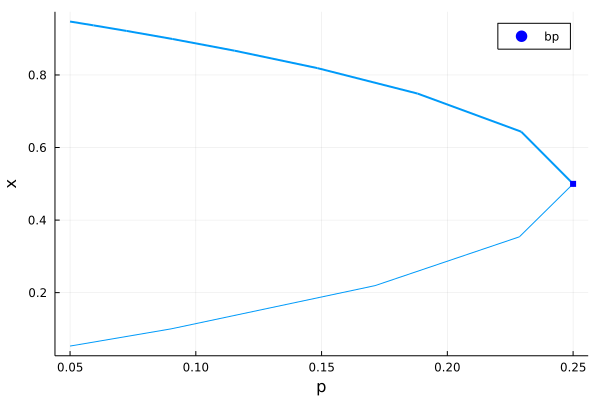

In [14]:
F=(x,p) -> @. logharvest1(x,(p,),0)
opts = ContinuationPar(pMin=0.05,pMax=0.3, detectBifurcation=3)
br, = continuation(F,[1.0],[1.0,1.0,0.05],(@lens _[3]), opts)
plot(br)

Podemos llevar la ecuacion logistica con harvest a la forma "normal" de la bifurcacion nodo silla con un cambio de variable y redefiniendo el parametro. El cambio de variable es $x->x+K/2$, con lo que ahora los puntos fijos estan simetricos con relacion a $x=0$: $x_* = \pm \sqrt{K^2/4-KH/R}$ y lo que esta dentro de la raiz es el nuevo parametro. Asi la nueva ecuacion queda:

$\dot{x} = a - x^2$

con $a=K^2/4-HK/R$. La bifurcacion se produce ahora en $a=0$ y genera un par de puntos fijos en $\pm\sqrt{a}$

In [15]:
@manipulate throttle=.05 for a=-0.5:0.01:0.5,x0=-1:0.02:1,tmax=1.0:5:50
    nodosilla(x,p,t)=p[1]-x*x
    flux1D(nodosilla,x0,tmax,[a],(u)->(u<-1.0);xlims=[-1.0,1.0])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["a"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008ae447e0, Task (runnable) @0x000000008ae447e0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-0.5\",\"-0.49\",\"-0.48\",\"-0.47\",\"-0.46\",\"-0.45\",\"-0.44\",\"-0.43\",\"-0.42\",\"-0.41\",\"-0.4\",\"-0.39\",\"-0.38\",\"-0.37\",\"-0.36\",\"-0.35\",\"-0.34\",\"-0.33\",\"-0.32\",\"-0.31\",\"-0.3\",\"-0

## Critical Slowing Down

Supongamos que tenemos el modelo logistico con harvest para los valores de capacidad y crecimiento $K=1$ y $R=1$, y queremos saber cual es el maximo valor de recursos que podemos extraer $H$ antes de que se extinga (catastroficamente) la poblacion. Segun el modelo sabemos que cuando la poblacion se aproxime a $K/2=0.5$ extrayendo algo menos de $KR/4=0.25$ recursos estamos al borde de la extincion. Pero si no tenemos el modelo. Hay alguna indicacion en la dinamica que nos de una pista de que estamos cerca de la bifurcacion? 

Una posibilidad es perturbar el sistema, si estamos en el punto fijo establecerca de la bifurcacion 

In [19]:
@manipulate throttle=.05 for H=0.2:0.001:0.25,S=0.0:0.001:0.1, tmax=10.0:5.0:500.0
    x0 = 0.5+sqrt(0.25-H)
    flux1D(logharvest1,x0,tmax,[1.0,1.0,H],10.0,S,(u)->(u<0);xlims=[0.0,1.0])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["H"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 51, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
26, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000f1e4650, Task (runnable) @0x000000000f1e4650), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.2\",\"0.201\",\"0.202\",\"0.203\",\"0.204\",\"0.205\",\"0.206\",\"0.207\",\"0.208\",\"0.209\",\"0.21\",\"0.211\",\"0.212\",\"0.213\",\"0.214\",\"0.215\",\"0.216\",\"0.217\",\"0.218\",\"0.219\",\"0.22\",\"0.22

## Potencial de Logistica con Harvest

Una interpretacion del CSD es que el pozo de potencial se hace mas "plano" cerca de la bifurcacion. Veamos que pasa a medida que nos acercamos a la bifurcacion con el potencial y con la trayectoria perturbada con la patada.

Al potencial de la logistica se le agrega un término $-Hx$ que corre los puntos fijos y hace que la barrera de potencial (punto fijo inestable) que antes estaba en 0 y no se podia cruzar se mueva a $K/2  - \sqrt{K^2/4-KH/R}  $

$V(x) = \frac{Rx^2}{3K}\left(x- \frac{3K}{2}\right) + Hx$

La bifurcacion de Nodo silla corresponde a el cambio del potencial cubico de una curva tipo N (una barrera y un pozo, punto fijo inestable y estable) a una curva sin vueltas (sin punto fijo)




In [20]:
Vlogharvest(x,p) = p[1]*x*x/(3*p[2])*(x-3*p[2]/2)+p[3]*x
@manipulate throttle=.05 for  H=0.2:0.001:0.25,S=-0.1:0.01:0.12, tmax=10.0:5.0:100.0
    x0 = 0.5+sqrt(0.25-H)
    potential1D(Vlogharvest,x0,tmax,[1.0,1.0,H],10.0,S,(u)->(u<0);xlims=[0.0,1.0])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["H"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 51, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
26, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000ab7ed2d0, Task (runnable) @0x00000000ab7ed2d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.2\",\"0.201\",\"0.202\",\"0.203\",\"0.204\",\"0.205\",\"0.206\",\"0.207\",\"0.208\",\"0.209\",\"0.21\",\"0.211\",\"0.212\",\"0.213\",\"0.214\",\"0.215\",\"0.216\",\"0.217\",\"0.218\",\"0.219\",\"0.22\",\"0.22